In [15]:
import os
import sys

# --- CONFIGURATION ---
REPO_URL = "https://github.com/filipematos95/ElementalWorld.git"
REPO_NAME = "ElementalWorld"
# ---------------------

# 1. Clone or update repo
if not os.path.exists(REPO_NAME):
    !git clone {REPO_URL}
    print("✅ Cloned!")
else:
    %cd {REPO_NAME}
    !git pull
    %cd ..
    print("✅ Pulled latest!")

# 2. Get CURRENT working directory (not hardcoded /content/)
repo_path = os.path.abspath(REPO_NAME)
print(f"Repo located at: {repo_path}")

# 3. Add to sys.path FIRST (highest priority)
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)
    print(f"✅ Added to sys.path: {repo_path}")

# 4. Verify files exist
print("Files in repo:")
!ls -la {REPO_NAME}

# 5. Import
try:
    from hybridmodel import *
    import ecosystem_plotting as plot
    print("✅ Imports successful!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Available files:")
    !find {REPO_NAME} -name "*.py"

/content/ElementalWorld
Already up to date.
/content
Files restored! You can now run imports.
Success!


In [82]:
import os
import sys
import matplotlib.pyplot as plt
from hybridmodel import *
import ecosystem_plotting as plot


tf.random.set_seed(35)
np.random.seed(35)

# --- 1. CONFIGURATION ---
H, W = 100, 100
MAX_AGENTS = 150000  # High limit for safety
N_STEPS = 500


# Define your niche for Spp0
spp0_niche = {
    "center": [0.40, 0.25, 0.15, 0.05, 0.05],
    "left":   [0.2, 0.1, 0.1, 0.03, 0.03],
    "right":  [0.1, 0.15, 0.1, 0.03, 0.03]
}

spp0_center = [0.15, 0.01, 0.05, 0.24]
spp1_center = [0.02, 0.02, 0.2, 0.531]
#spp1_center = [0.5, 0.7, 0.5, 0.3]

spp1_niche =  {
    "center": [0.43, 0.02, 0.02, 0.2, 0.531],
    "right":   [0.5, 0.01,  0.005, 0.1, 0.2],
    "left":  [0.35, 0.01,  0.005, 0.1, 0.2]   }

spp1_center = [0.135, 0.085, 0.125, 0.29] # [N, P, K, O]

NICHE_CENTERS = np.array([spp0_niche["center"],spp1_niche["center"] ], dtype=np.float32)
NICHE_LEFT    = np.array([spp0_niche["left"], spp1_niche["left"]], dtype=np.float32)
NICHE_RIGHT   = np.array([spp0_niche["right"], spp1_niche["right"]], dtype=np.float32)

growth_rate = 0.15
respiration_rate = 0.01
turnover_rate = 0.03
mineralization_rate = 0.05
seed_cost = 0.02
seed_mass = 0.02
K_biomass = 2.5
soil_input_rate = 1.5

model = HybridEcosystem(
    height=H, width=W, max_agents=MAX_AGENTS,
    niche_centers=NICHE_CENTERS,
    niche_left=NICHE_LEFT,
    niche_right=NICHE_RIGHT,
    growth_rate=growth_rate,
    respiration_rate=respiration_rate,
    turnover_rate=turnover_rate,
    mineralization_rate=mineralization_rate,
    seed_cost=seed_cost,
    seed_mass=seed_mass,
    K_biomass=K_biomass, soil_base_ratio=np.array(spp1_center), soil_pool_mean = 1.5,
    soil_pool_std = 0.05, soil_ratio_noise = 0.01, soil_input_rate = soil_input_rate)

model.add_initial_seeds(count=300, species_id=0)
model.add_initial_seeds(count=300, species_id=1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Nutrient names and soil indices
nutrients = [
    ('Nitrogen (N)', 0),
    ('Phosphorus (P)', 1),
    ('Potassium (K)', 2),
    ('Oxygen (O)', 3)
]

# Plot each nutrient
for ax, (name, idx) in zip(axes.flatten(), nutrients):
    im = ax.imshow(model.soil[:,:,idx].numpy(), cmap='viridis')
    ax.set_title(f'Soil {name} Distribution', fontsize=12)
    plt.colorbar(im, ax=ax, label=f'{name} Concentration')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')

plt.tight_layout()
plt.show()

history_biomass = []
history_elements = []
history_biomass_grid = []

N_SPP = 2 # Number of species
history_spp_biomass = [[] for _ in range(N_SPP)]
history_spp_count = [[] for _ in range(N_SPP)]

print("Starting Simulation...")
for t in range(N_STEPS):
    n_agents = model.step()

    if t % 10 == 0:
        # A. Record TOTAL stats (what you already have)
        grid_mass_total = model.get_biomass_grid()
        mean_mass_total = np.mean(grid_mass_total)
        history_biomass.append(mean_mass_total)

        pools = model.get_element_pools()
        history_elements.append(pools)

        # B. NEW: Record PER-SPECIES stats
        for s_id in range(N_SPP):
            spp_grid = model.get_species_biomass(s_id)
            history_spp_biomass[s_id].append(np.mean(spp_grid))

        if t % 50 == 0:
            history_biomass_grid.append(grid_mass_total)

        print(f"Step {t}: Agents={n_agents.numpy()}, Mean Biomass={mean_mass_total:.4f}")

Added 100 seeds of Spp 0.
Starting Simulation...
Step 0: Agents=100, Mean Biomass=0.0045
Step 10: Agents=145, Mean Biomass=0.0245
Step 20: Agents=257, Mean Biomass=0.0518
Step 30: Agents=440, Mean Biomass=0.0807
Step 40: Agents=729, Mean Biomass=0.1128
Step 50: Agents=1126, Mean Biomass=0.1450
Step 60: Agents=1658, Mean Biomass=0.1699
Step 70: Agents=2168, Mean Biomass=0.1925
Step 80: Agents=2660, Mean Biomass=0.2083
Step 90: Agents=3014, Mean Biomass=0.2277
Step 100: Agents=3280, Mean Biomass=0.2444
Step 110: Agents=3511, Mean Biomass=0.2582
Step 120: Agents=3711, Mean Biomass=0.2713
Step 130: Agents=3876, Mean Biomass=0.2835
Step 140: Agents=4006, Mean Biomass=0.2918
Step 150: Agents=4129, Mean Biomass=0.3024
Step 160: Agents=4247, Mean Biomass=0.3090
Step 170: Agents=4353, Mean Biomass=0.3149
Step 180: Agents=4441, Mean Biomass=0.3204
Step 190: Agents=4520, Mean Biomass=0.3263
Step 200: Agents=4604, Mean Biomass=0.3311
Step 210: Agents=4683, Mean Biomass=0.3343
Step 220: Agents=4741

In [ ]:
plt.figure(figsize=(10, 5))
for s_id in range(N_SPP):
    plt.plot(range(0, N_STEPS, 10), history_spp_biomass[s_id], label=f"Species {s_id}")

plt.plot(range(0, N_STEPS, 10), history_biomass, label="Total", color='black', linestyle='--')
plt.legend()
plt.title("Biomass by Species")
plt.show()

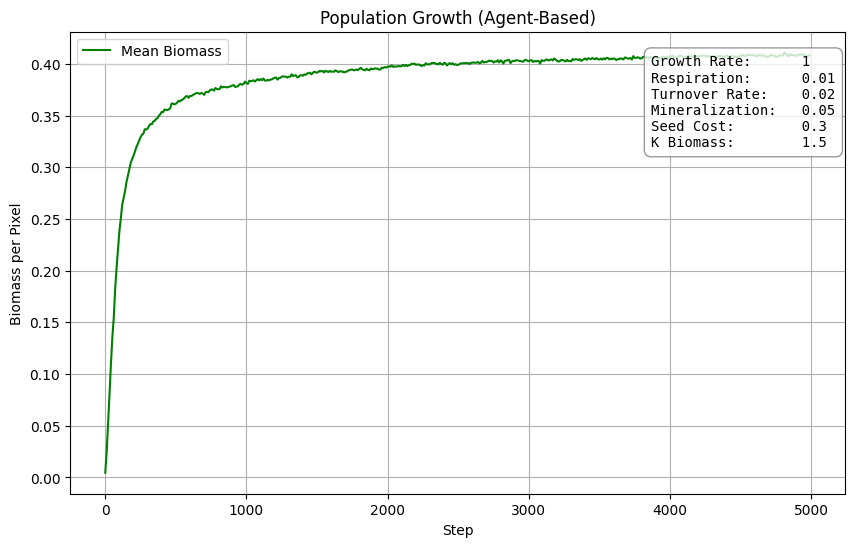

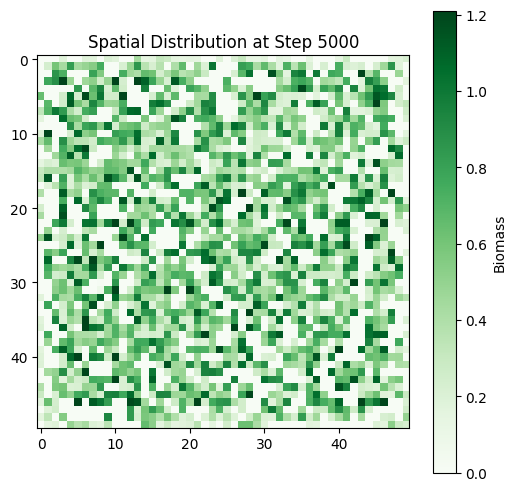

In [93]:
history_elements = np.array(history_elements)

params_text = (
    f"Growth Rate:      {growth_rate}\n"
    f"Respiration:      {respiration_rate}\n"
    f"Turnover Rate:    {turnover_rate}\n"
    f"Mineralization:   {mineralization_rate}\n"
    f"Seed Cost:        {seed_cost}\n"
    f"K Biomass:        {K_biomass}"
)


# Plot 1: Biomass Trajectory
plt.figure(figsize=(10, 6))
plt.plot(range(0, N_STEPS, 10), history_biomass, label="Mean Biomass", color='green')
plt.text(0.75, 0.95, params_text,
         transform=plt.gca().transAxes,  # Use relative coordinates (0-1)
         fontsize=10,
         verticalalignment='top',
         fontfamily='monospace',         # Monospace makes numbers align perfectly
         bbox=dict(boxstyle='round,pad=0.5',
                   facecolor='white',
                   alpha=0.8,            # Semi-transparent background
                   edgecolor='gray'))
plt.xlabel("Step")
plt.ylabel("Biomass per Pixel")
plt.title("Population Growth (Agent-Based)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Elemental Pools (C, N, P, K)
#labels = ["Carbon", "Nitrogen", "Phosphorus", "Potassium", "Other"]
#plt.figure(figsize=(10, 5))
#for i in range(5):
#    plt.plot(range(0, N_STEPS, 10), history_elements[:, i], label=labels[i])
#plt.xlabel("Step")
#plt.ylabel("Total Ecosystem Mass")
#plt.title("Elemental Stoichiometry Pools")
#plt.legend()
#plt.grid(True)
#plt.show()

# Plot 3: Final Map
final_grid = model.get_biomass_grid()
plt.figure(figsize=(6, 6))
plt.imshow(final_grid, cmap='Greens', vmin=0, vmax=np.percentile(final_grid, 99))
plt.colorbar(label="Biomass")
plt.title(f"Spatial Distribution at Step {N_STEPS}")
plt.show()

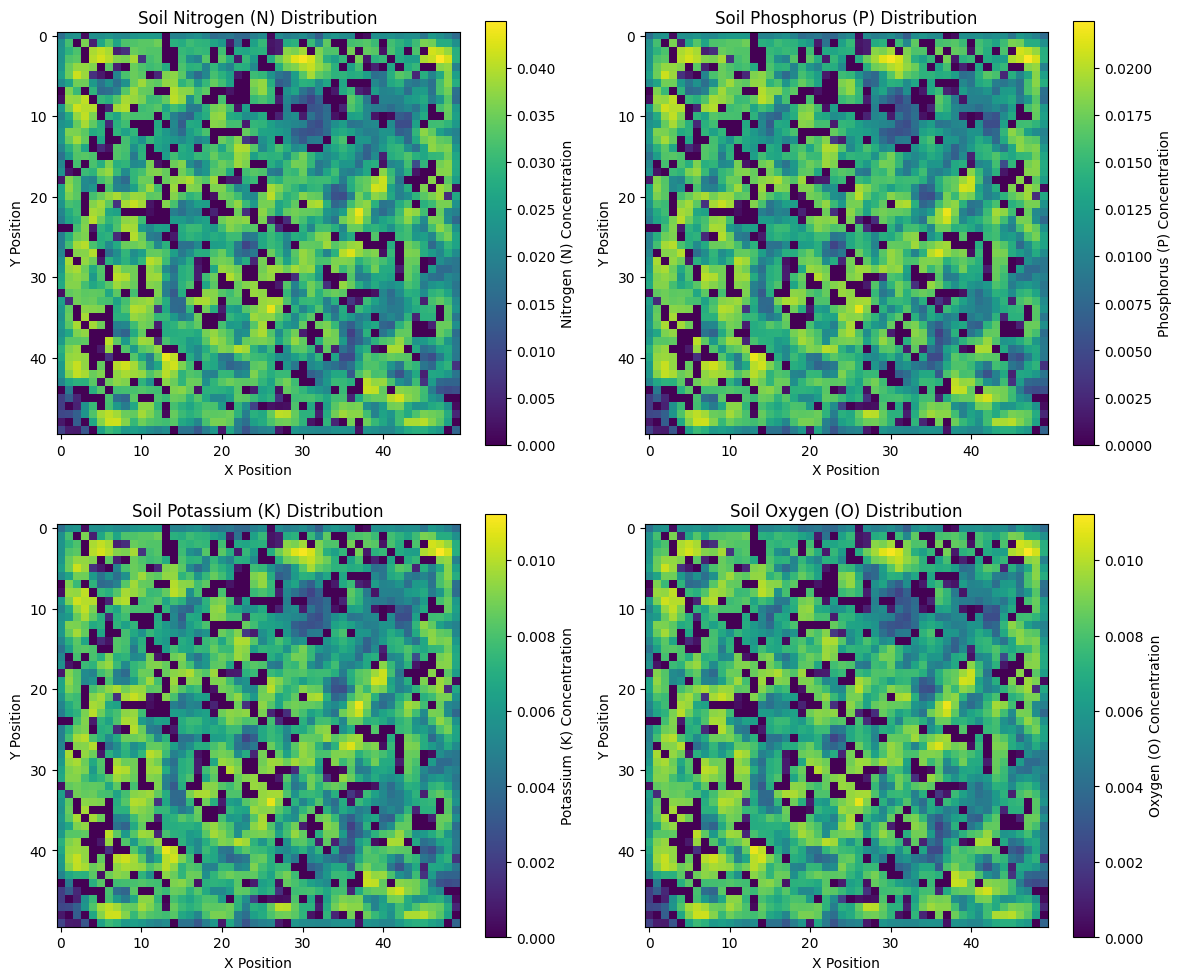

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Nutrient names and soil indices
nutrients = [
    ('Nitrogen (N)', 0),
    ('Phosphorus (P)', 1),
    ('Potassium (K)', 2),
    ('Oxygen (O)', 3)
]

# Plot each nutrient
for ax, (name, idx) in zip(axes.flatten(), nutrients):
    im = ax.imshow(model.soil[:,:,idx].numpy(), cmap='viridis')
    ax.set_title(f'Soil {name} Distribution', fontsize=12)
    plt.colorbar(im, ax=ax, label=f'{name} Concentration')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')

plt.tight_layout()
plt.show()

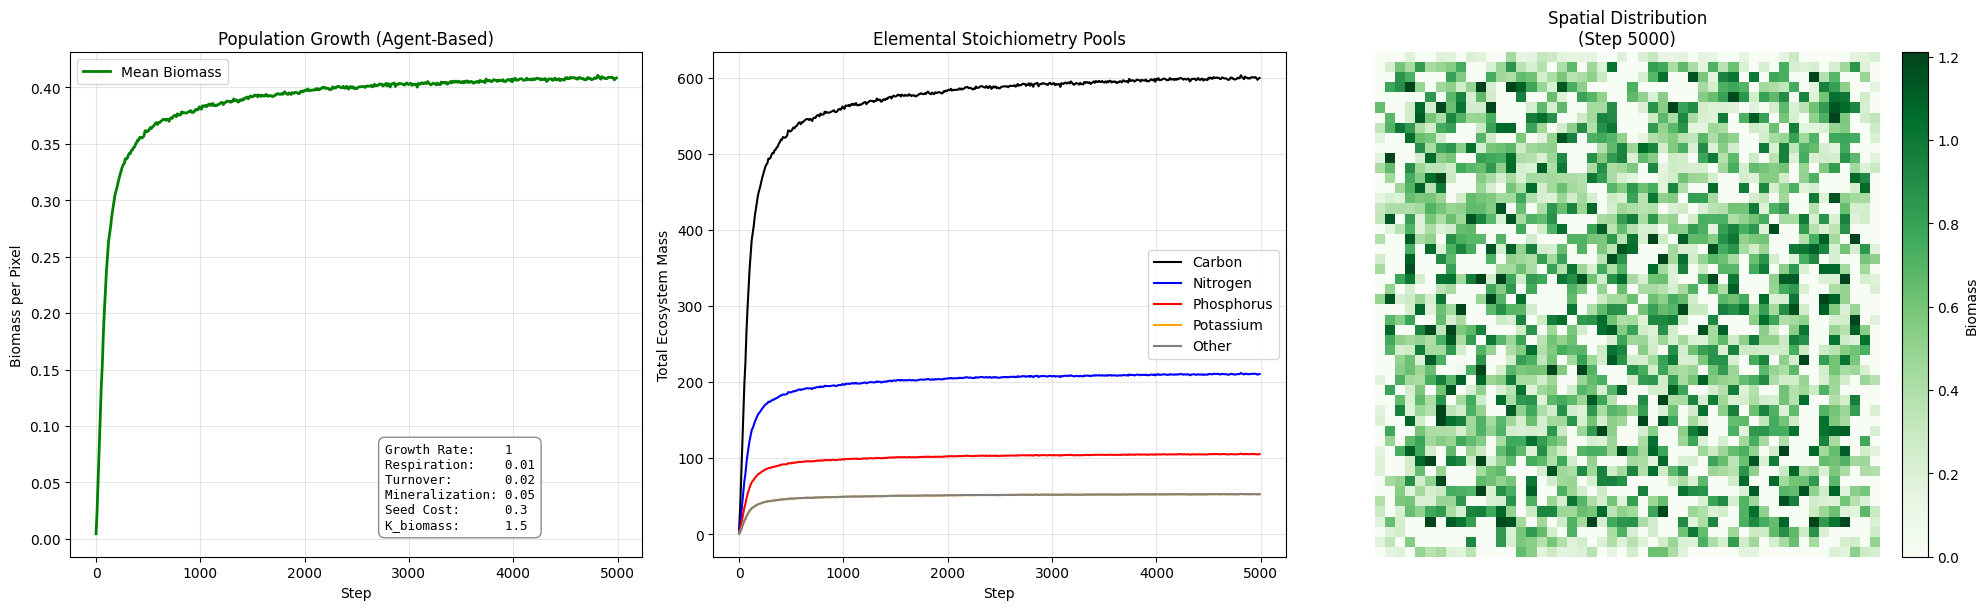

In [94]:
# --- Setup the figure with 1 row and 3 columns ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ==========================================
# PLOT 1: BIOMASS GROWTH (Left)
# ==========================================
ax1 = axes[0]
ax1.plot(range(0, N_STEPS, 10), history_biomass, label="Mean Biomass", color='green', linewidth=2)

# Parameter Box
params_text = (
    f"Growth Rate:    {growth_rate}\n"
    f"Respiration:    {respiration_rate}\n"
    f"Turnover:       {turnover_rate}\n"
    f"Mineralization: {mineralization_rate}\n"
    f"Seed Cost:      {seed_cost}\n"
    f"K_biomass:      {K_biomass}"
)

ax1.text(0.55, 0.05, params_text,  # Moved to bottom-right (0.55, 0.05) to avoid overlap with plateau
         transform=ax1.transAxes,
         fontsize=9,
         verticalalignment='bottom',
         fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xlabel("Step")
ax1.set_ylabel("Biomass per Pixel")
ax1.set_title("Population Growth (Agent-Based)")
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# ==========================================
# PLOT 2: ELEMENTAL POOLS (Middle)
# ==========================================
ax2 = axes[1]
labels = ["Carbon", "Nitrogen", "Phosphorus", "Potassium", "Other"]
# history_elements shape is presumably (TimeSteps, 5)
# We assume you have history_elements ready
colors = ['black', 'blue', 'red', 'orange', 'gray'] # Distinct colors for elements

for i in range(5):
    ax2.plot(range(0, N_STEPS, 10), history_elements[:, i], label=labels[i], color=colors[i])

ax2.set_xlabel("Step")
ax2.set_ylabel("Total Ecosystem Mass")
ax2.set_title("Elemental Stoichiometry Pools")
ax2.legend()
ax2.grid(True, alpha=0.3)

# ==========================================
# PLOT 3: SPATIAL MAP (Right)
# ==========================================
ax3 = axes[2]
final_grid = model.get_biomass_grid()

# Use percentile for robust vmax to avoid outlier pixels washing out the map
vmax_val = np.percentile(final_grid, 99) if np.max(final_grid) > 0 else 1.0

im = ax3.imshow(final_grid, cmap='Greens', vmin=0, vmax=vmax_val)
ax3.set_title(f"Spatial Distribution\n(Step {N_STEPS})")
ax3.axis('off') # Hide axis ticks for the map

# Add colorbar to the map subplot
cbar = fig.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)
cbar.set_label("Biomass")

# --- Final Layout Adjustment ---
plt.tight_layout()
plt.show()